In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import welch

In [12]:
raw_data = np.fromfile("/media/star/Elements/36s/dataset/type1(fs=320k)/3/burst/burst_7.std", dtype=np.int16, count=-1, sep='', offset=50)

fs = 30720 * 1e3
raw_data = raw_data.reshape(-1, 2)    # 将它重新整形成一个有两列的二维数组。-1 表示让 NumPy 自动计算行数，这样整个数据将会按两个元素为一组进行分割,处理双通道
raw_data.shape

(5200, 2)

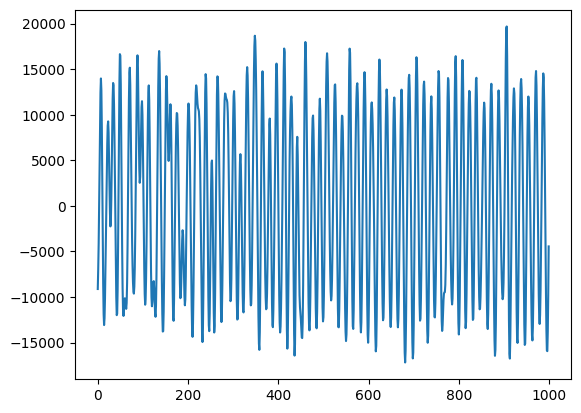

In [13]:
plt.plot(raw_data[:1000, 0])    # 查看某一个通道的1k个数据点喵

((65, 63), (65,), (63,))

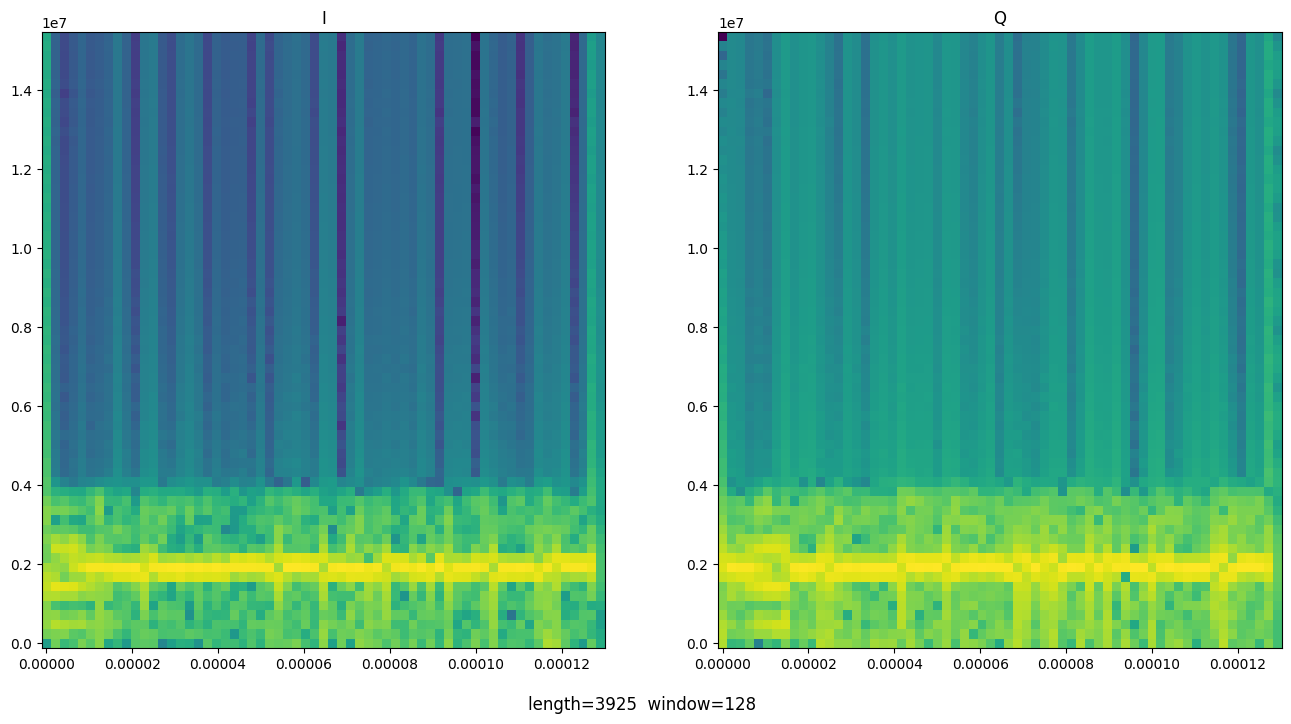

In [14]:
## 做短时傅里叶变换查看IQ两路信号喵（一个通道是I 另一个是Q喵）
ds = 1                              # 下采样因子，这里设置为 1，表示不进行下采样。
length = 3925                   # 要处理的数据长度
offset = 50                          # 数据起始位置的偏移量
window = 128                        # STFT 的窗口长度
i_f, i_t, i_Sxx = signal.stft(raw_data[offset:length + offset:ds, 0], fs=fs//ds, window='hamming', nperseg=window)
q_f, q_t, q_Sxx = signal.stft(raw_data[offset:length + offset:ds, 1], fs=fs//ds, window='hamming', nperseg=window)
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.pcolormesh(i_t, i_f, 20 * np.log10(np.abs(i_Sxx) ** 2))    # 将功率谱密度转换为分贝（dB）单位，用于更好地可视化动态范围较大的数据
plt.title("I")
plt.subplot(122)
plt.pcolormesh(q_t, q_f, 20 * np.log10(np.abs(q_Sxx) ** 2))
plt.title("Q")
plt.suptitle("length={}  window={}".format(length, window), y=0.05)
i_Sxx.shape, i_f.shape, i_t.shape

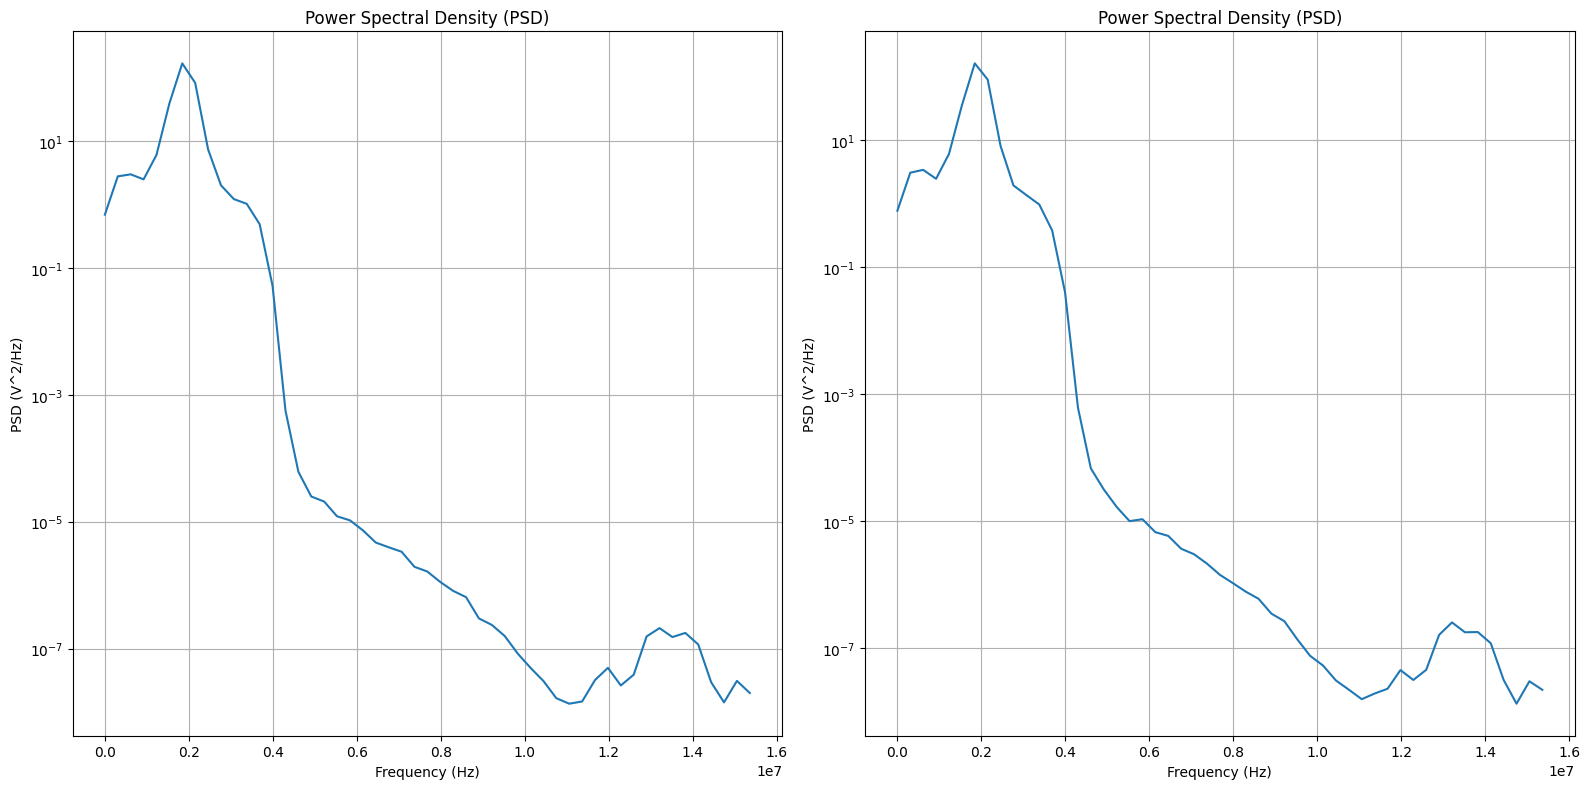

In [15]:
## 绘制功率谱密度PSD
data_channel_1 = raw_data[:,0]
data_channel_2 = raw_data[:,1]

frequencies1, psd1 = welch(data_channel_1, fs, nperseg=100)
frequencies2, psd2 = welch(data_channel_2, fs, nperseg=100)

plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.semilogy(frequencies1, psd1)
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.grid(True)
plt.tight_layout()

plt.subplot(122)
plt.semilogy(frequencies2, psd2)
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.grid(True)
plt.tight_layout()